# Creating Dataset


In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Define the path to your dataset, the path to the test dataset folder, and the path to the train dataset folder
dataset_path = "c:\\Users\\deera\\OneDrive\Desktop\\Medicinal-Plant-Leaf-Detection\\processed"
test_dataset_path = "c:\\Users\\deera\\OneDrive\Desktop\\Medicinal-Plant-Leaf-Detection\\Test"
train_dataset_path = "c:\\Users\\deera\\OneDrive\Desktop\\Medicinal-Plant-Leaf-Detection\\Train"


# Define the list of class names (plant species)
class_names = ['Arive-Dantu', 'Basale', 'Betel', 'Crape_Jasmine', 'Curry', 'Drumstick', 'Fenugreek', 'Guava', 'Hibiscus', 'Indian_Beech', 'Indian_Mustard', 'Jackfruit', 'Jamaica_Cherry-Gasagase', 'Jamun', 'Jasmine', 'Karanda', 'Lemon', 'Mango', 'Mexican_Mint', 'Mint', 'Neem', 'Oleander', 'Parijata', 'Peepal', 'Pomegranate', 'Rasna', 'Rose_Apple', 'Roxburgh_fig', 'Sandalwood', 'Tulsi']

# Initialize lists to store image file paths and corresponding labels
image_paths = []
labels = []

# Load image file paths and labels
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    img_files = os.listdir(class_path)
    
    for file in img_files:
        img_path = os.path.join(class_path, file)
        image_paths.append(img_path)
        labels.append(class_name)

# Shuffle the dataset
image_paths, labels = shuffle(image_paths, labels, random_state=42)

# Split the dataset into training (70%), validation (10%), and testing (20%) sets
train_image_paths, temp_image_paths, train_labels, temp_labels = train_test_split(image_paths, labels, test_size=0.3, random_state=42, stratify=labels)
val_image_paths, test_image_paths, val_labels, test_labels = train_test_split(temp_image_paths, temp_labels, test_size=0.67, random_state=42, stratify=temp_labels)

# Create the test dataset folder if it doesn't exist
if not os.path.exists(test_dataset_path):
    os.makedirs(test_dataset_path)

# Create the train dataset folder if it doesn't exist
if not os.path.exists(train_dataset_path):
    os.makedirs(train_dataset_path)

# Move the training images to the train dataset folder
for train_image_path, train_label in zip(train_image_paths, train_labels):
    class_path = os.path.join(train_dataset_path, train_label)
    if not os.path.exists(class_path):
        os.makedirs(class_path)
    shutil.copy(train_image_path, class_path)

# Create the validation dataset folder if it doesn't exist
val_dataset_path = "C:\\Users\\appin\\Desktop\\Leaf-Classification-Medicinal-master\\Validation"
if not os.path.exists(val_dataset_path):
    os.makedirs(val_dataset_path)

# Move the validation images to the validation dataset folder
for val_image_path, val_label in zip(val_image_paths, val_labels):
    class_path = os.path.join(val_dataset_path, val_label)
    if not os.path.exists(class_path):
        os.makedirs(class_path)
    shutil.copy(val_image_path, class_path)

# Move the test images to the test dataset folder
for test_image_path, test_label in zip(test_image_paths, test_labels):
    class_path = os.path.join(test_dataset_path, test_label)
    if not os.path.exists(class_path):
        os.makedirs(class_path)
    shutil.copy(test_image_path, class_path)

print("Train, validation, and test datasets created with stratified sampling.")


Train, validation, and test datasets created with stratified sampling.


# CNN

In [6]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define class names (plant species)
# class_names = ['Arive-Dantu', 'Basale', 'Betel', 'Crape_Jasmine', 'Curry', 'Drumstick', 'Fenugreek', 'Guava', 'Hibiscus', 'Indian_Beech', 'Indian_Mustard', 'Jackfruit', 'Jamaica_Cherry-Gasagase', 'Jamun', 'Jasmine', 'Karanda', 'Lemon', 'Mango', 'Mexican_Mint', 'Mint', 'Neem', 'Oleander', 'Parijata', 'Peepal', 'Pomegranate', 'Rasna', 'Rose_Apple', 'Roxburgh_fig', 'Sandalwood', 'Tulsi']

# Define the path to your dataset, the path to the test dataset folder, and the path to the train dataset folder
# dataset_path = "c:\\Users\\deera\\OneDrive\Desktop\\Medicinal-Plant-Leaf-Detection\\processed"
# test_dataset_path = "c:\\Users\\deera\\OneDrive\Desktop\\Medicinal-Plant-Leaf-Detection\\Test"
# train_dataset_path = "c:\\Users\\deera\\OneDrive\Desktop\\Medicinal-Plant-Leaf-Detection\\Train"

# # Define constants
# input_shape = (224, 224, 3)  # Adjust to match your leaf image dimensions
# num_classes = len(class_names)  # The number of leaf types in your dataset
# batch_size = 32
# epochs = 100

# # Create a CNN model
# model = Sequential()

# # Convolutional layers
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())

# # Fully connected layers
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer=Adam(learning_rate=0.001),
#               metrics=['accuracy'])

# # Data augmentation for the training set
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')

# train_generator = train_datagen.flow_from_directory(
#     train_dataset_path,
#     target_size=input_shape[:2],
#     batch_size=batch_size,
#     class_mode='categorical')

# # Data preprocessing for the validation and test sets
# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# val_generator = val_datagen.flow_from_directory(
#     val_dataset_path,
#     target_size=input_shape[:2],
#     batch_size=batch_size,
#     class_mode='categorical')

# test_generator = test_datagen.flow_from_directory(
#     test_dataset_path,
#     target_size=input_shape[:2],
#     batch_size=batch_size,
#     class_mode='categorical')

# # Define a callback to save the best model during training
# checkpoint = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# # Train the model without early stopping
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=epochs,
#     validation_data=val_generator,
#     validation_steps=val_generator.samples // batch_size,
#     callbacks=[checkpoint])

# # Save the trained model to a file
# model.save('leaf_classification_model1.h5')

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(test_generator)
# print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Found 9721 images belonging to 30 classes.
Found 1375 images belonging to 30 classes.
Found 2792 images belonging to 30 classes.
Epoch 1/100
303/303 [==============================] - ETA: 0s - loss: 3.1338 - accuracy: 0.1128
Epoch 1: val_accuracy improved from -inf to 0.38467, saving model to best_model1.h5


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


303/303 [==============================] - 363s 1s/step - loss: 3.1338 - accuracy: 0.1128 - val_loss: 2.0604 - val_accuracy: 0.3847
Epoch 2/100
303/303 [==============================] - ETA: 0s - loss: 2.1325 - accuracy: 0.3526
Epoch 2: val_accuracy improved from 0.38467 to 0.66146, saving model to best_model1.h5
303/303 [==============================] - 294s 968ms/step - loss: 2.1325 - accuracy: 0.3526 - val_loss: 1.1773 - val_accuracy: 0.6615
Epoch 3/100
303/303 [==============================] - ETA: 0s - loss: 1.6369 - accuracy: 0.4962
Epoch 3: val_accuracy did not improve from 0.66146
303/303 [==============================] - 288s 949ms/step - loss: 1.6369 - accuracy: 0.4962 - val_loss: 1.1385 - val_accuracy: 0.6451
Epoch 4/100
303/303 [==============================] - ETA: 0s - loss: 1.3384 - accuracy: 0.5832
Epoch 4: val_accuracy improved from 0.66146 to 0.78869, saving model to best_model1.h5
303/303 [==============================] - 289s 952ms/step - loss: 1.3384 - accura

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define class names (plant species)
class_names = ['Arive-Dantu', 'Basale', 'Betel', 'Crape_Jasmine', 'Curry', 'Drumstick', 'Fenugreek', 'Guava', 'Hibiscus', 'Indian_Beech', 'Indian_Mustard', 'Jackfruit', 'Jamaica_Cherry-Gasagase', 'Jamun', 'Jasmine', 'Karanda', 'Lemon', 'Mango', 'Mexican_Mint', 'Mint', 'Neem', 'Oleander', 'Parijata', 'Peepal', 'Pomegranate', 'Rasna', 'Rose_Apple', 'Roxburgh_fig', 'Sandalwood', 'Tulsi']

# Define the path to your dataset, the path to the test dataset folder, and the path to the train dataset folder
dataset_path = "c:\\Users\\deera\\OneDrive\Desktop\\Medicinal-Plant-Leaf-Detection\\processed"
test_dataset_path = "c:\\Users\\deera\\OneDrive\Desktop\\Medicinal-Plant-Leaf-Detection\\Test"
train_dataset_path = "c:\\Users\\deera\\OneDrive\Desktop\\Medicinal-Plant-Leaf-Detection\\Train"

# Define constants
input_shape = (224, 224, 3)
num_classes = len(class_names)
batch_size = 32
epochs = 100

# Load a pre-trained model (VGG16 in this example)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()

# Add the pre-trained model as a base
model.add(base_model)

# Add a global average pooling layer
model.add(tf.keras.layers.GlobalAveragePooling2D())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

# Data preprocessing for the validation and test sets
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

# Define a callback to save the best model during training
checkpoint = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights to the best epoch
)

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]  # Include early stopping
)

# Save the trained model to a file
model.save('leaf_classification_model2.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Found 9721 images belonging to 30 classes.
Found 1375 images belonging to 30 classes.
Found 2792 images belonging to 30 classes.
Epoch 1/100
303/303 [==============================] - ETA: 0s - loss: 2.5451 - accuracy: 0.3142
Epoch 1: val_accuracy improved from -inf to 0.73363, saving model to best_model2.h5
303/303 [==============================] - 592s 2s/step - loss: 2.5451 - accuracy: 0.3142 - val_loss: 1.3649 - val_accuracy: 0.7336
Epoch 2/100


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


303/303 [==============================] - ETA: 0s - loss: 1.3958 - accuracy: 0.5943
Epoch 2: val_accuracy improved from 0.73363 to 0.83854, saving model to best_model2.h5
303/303 [==============================] - 622s 2s/step - loss: 1.3958 - accuracy: 0.5943 - val_loss: 0.7476 - val_accuracy: 0.8385
Epoch 3/100
303/303 [==============================] - ETA: 0s - loss: 1.0260 - accuracy: 0.6873
Epoch 3: val_accuracy improved from 0.83854 to 0.86086, saving model to best_model2.h5
303/303 [==============================] - 598s 2s/step - loss: 1.0260 - accuracy: 0.6873 - val_loss: 0.5727 - val_accuracy: 0.8609
Epoch 4/100
303/303 [==============================] - ETA: 0s - loss: 0.8321 - accuracy: 0.7474
Epoch 4: val_accuracy improved from 0.86086 to 0.89881, saving model to best_model2.h5
303/303 [==============================] - 592s 2s/step - loss: 0.8321 - accuracy: 0.7474 - val_loss: 0.4384 - val_accuracy: 0.8988
Epoch 5/100
303/303 [==============================] - ETA: 0s -

In [3]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 30)                7710      
                                                                 
Total params: 14853726 (56.66 MB)
Trainable params: 139038 (543.12 KB)
Non-trainable params: 14714688 (56.13 MB)
_______

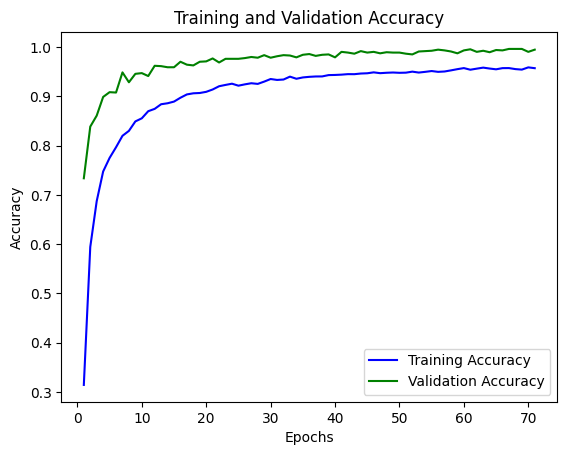

In [4]:
import matplotlib.pyplot as plt

# Assuming you have trained the model and have the 'history' object
# The 'history' object should contain 'accuracy' and 'val_accuracy' values for each epoch

# Extract accuracy and validation accuracy from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(accuracy) + 1)

# Plot training accuracy
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
# Plot validation accuracy
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Prediction 

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('leaf_classification_model2.h5')  # Replace with the path to your trained model file

# Define class names (plant species)
class_names = ['Arive-Dantu', 'Basale', 'Betel', 'Crape_Jasmine', 'Curry', 'Drumstick', 'Fenugreek', 'Guava', 'Hibiscus', 'Indian_Beech', 'Indian_Mustard', 'Jackfruit', 'Jamaica_Cherry-Gasagase', 'Jamun', 'Jasmine', 'Karanda', 'Lemon', 'Mango', 'Mexican_Mint', 'Mint', 'Neem', 'Oleander', 'Parijata', 'Peepal', 'Pomegranate', 'Rasna', 'Rose_Apple', 'Roxburgh_fig', 'Sandalwood', 'Tulsi']

# Define a function to predict the leaf class from an image file
def predict_leaf_class(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image

    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    return predicted_class, confidence

# Example usage
image_path = 'leaf_with_green_leaf163.jpg'  # Replace with the path to your leaf image
predicted_class, confidence = predict_leaf_class(image_path)
print(f'Predicted Class: {predicted_class}')
print(f'Confidence: {confidence:.2f}')


1/1 [==============================] - 0s 375ms/step
Predicted Class: Neem
Confidence: 1.00


# Classification Report

In [15]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model (replace with your model path)
model = tf.keras.models.load_model('leaf_classification_model2.h5')

# Define the path to your test dataset folder
test_dataset_path = "C:\\Users\\appin\\Desktop\\Leaf-Classification-Medicinal-master\\Test"

# Define constants
input_shape = (224, 224, 3)  # Make sure it matches the input shape of your model
batch_size = 32

# Define the test data generator (including test data preprocessing)
test_datagen = ImageDataGenerator(rescale=1./255)  # You can adjust the preprocessing as needed

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to ensure labels match predictions
)

# Make predictions on the test dataset
predictions = model.predict(test_generator)

# Get the predicted class labels (index of maximum probability)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true class labels
true_labels = test_generator.classes

# Define class names (plant species)
class_names = ['Arive-Dantu', 'Basale', 'Betel', 'Crape_Jasmine', 'Curry', 'Drumstick', 'Fenugreek', 'Guava', 'Hibiscus', 'Indian_Beech', 'Indian_Mustard', 'Jackfruit', 'Jamaica_Cherry-Gasagase', 'Jamun', 'Jasmine', 'Karanda', 'Lemon', 'Mango', 'Mexican_Mint', 'Mint', 'Neem', 'Oleander', 'Parijata', 'Peepal', 'Pomegranate', 'Rasna', 'Rose_Apple', 'Roxburgh_fig', 'Sandalwood', 'Tulsi']

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print(report)


Found 2792 images belonging to 30 classes.
88/88 [==============================] - 164s 2s/step
                         precision    recall  f1-score   support

            Arive-Dantu       0.99      0.99      0.99       100
                 Basale       1.00      1.00      1.00        62
                  Betel       1.00      1.00      1.00        96
          Crape_Jasmine       0.99      1.00      1.00       100
                  Curry       0.99      0.99      0.99       101
              Drumstick       1.00      0.98      0.99       101
              Fenugreek       0.97      0.99      0.98        72
                  Guava       1.00      1.00      1.00       101
               Hibiscus       1.00      1.00      1.00        86
           Indian_Beech       1.00      1.00      1.00       100
         Indian_Mustard       1.00      1.00      1.00        68
              Jackfruit       1.00      0.98      0.99       101
Jamaica_Cherry-Gasagase       1.00      1.00      1.00   

# Confusion Matrix on Test Data

Found 2792 images belonging to 30 classes.
88/88 [==============================] - 173s 2s/step


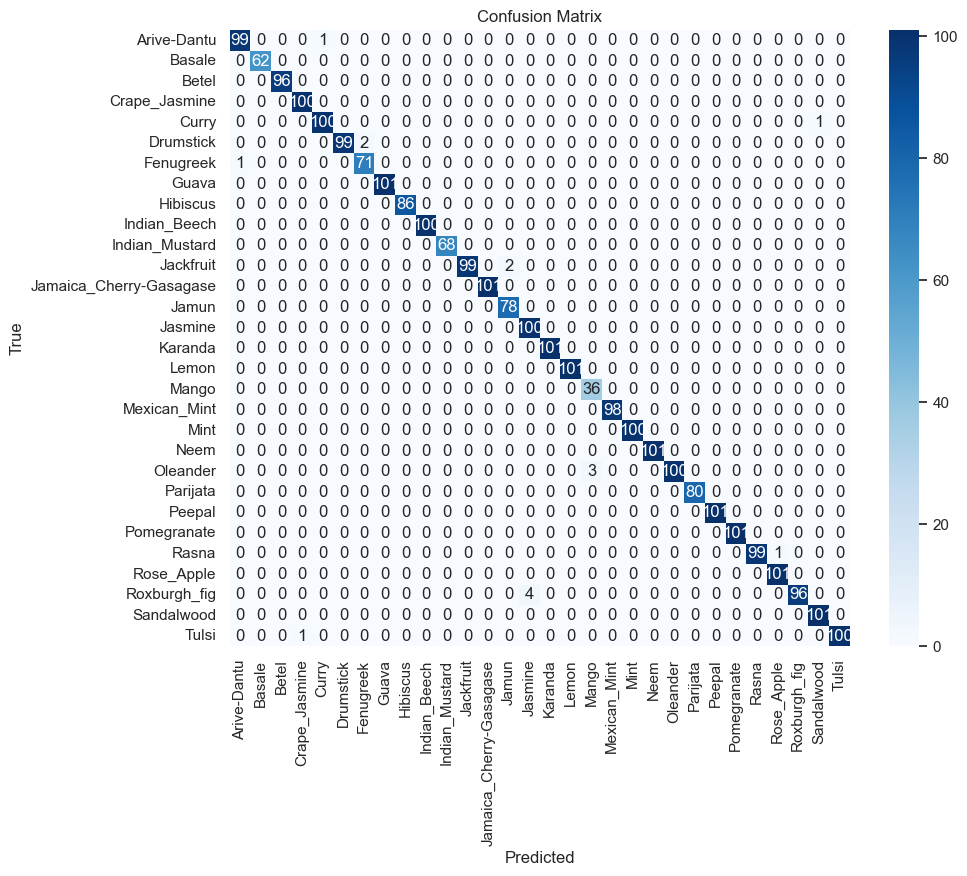

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Assuming you have already loaded the trained model and have the test dataset and its labels

# Load the trained model (if not loaded already)
model = tf.keras.models.load_model('leaf_classification_model2.h5')  # Replace with your model path

# Assuming you have the test generator with true labels
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Set shuffle to False to ensure labels match predictions
)

# Make predictions on the test dataset
predictions = model.predict(test_generator)

# Get the predicted class labels (index of maximum probability)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true class labels
true_labels = test_generator.classes

# Get the class names for the confusion matrix
class_labels = [class_names[i] for i in range(len(class_names))]

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.set(style='whitegrid')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, class_labels, title='Confusion Matrix')


# Confusion Matrix on Validation Data

Found 1375 images belonging to 30 classes.
43/43 [==============================] - 6s 147ms/step


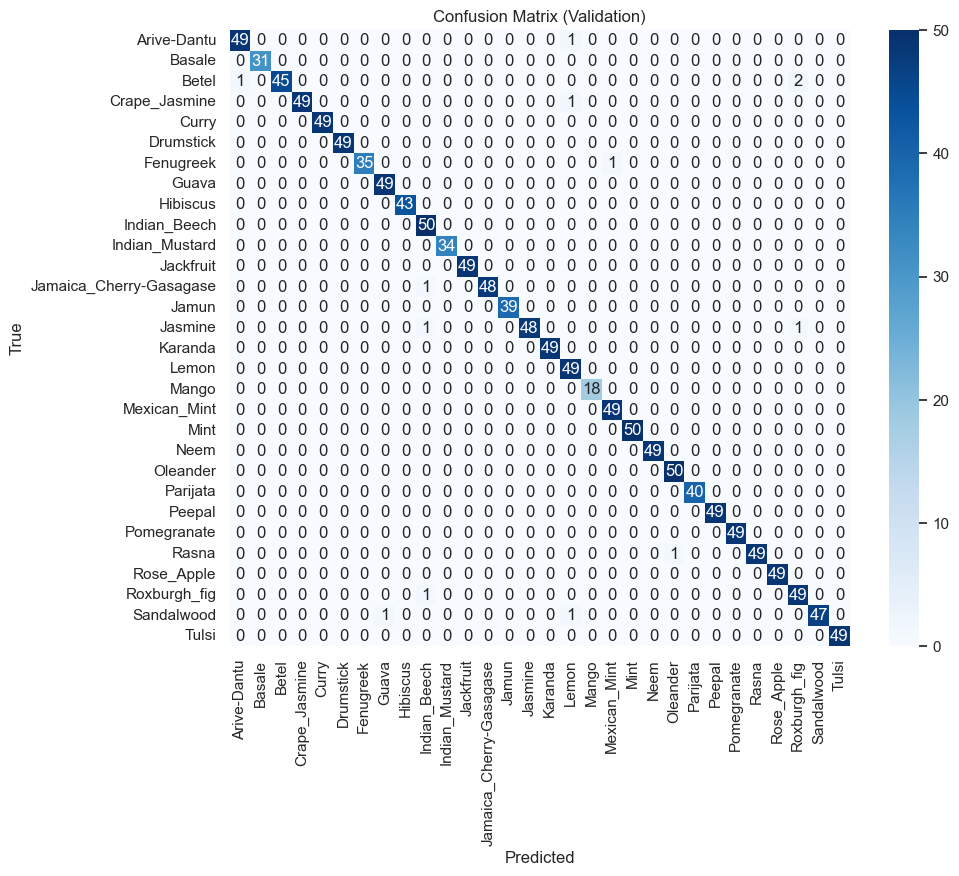

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Assuming you have already loaded the trained model and have the validation dataset and its labels

# Load the trained model (if not loaded already)
model = tf.keras.models.load_model('leaf_classification_model2.h5')  # Replace with your model path

# Assuming you have the validation generator with true labels
val_generator = val_datagen.flow_from_directory(
    val_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Set shuffle to False to ensure labels match predictions
)

# Make predictions on the validation dataset
predictions = model.predict(val_generator)

# Get the predicted class labels (index of maximum probability)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true class labels
true_labels = val_generator.classes

# Get the class names for the confusion matrix
class_labels = [class_names[i] for i in range(len(class_names))]

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.set(style='whitegrid')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, class_labels, title='Confusion Matrix (Validation)')


# To give image with white background

In [1]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('C:\\Users\\deera\\Downloads\\neem.jpg')

# Create a mask
mask = np.zeros(image.shape[:2], np.uint8)

# Define a rectangle around the leaf (you may need to adjust the coordinates)
rect = (10, 10, image.shape[1] - 20, image.shape[0] - 20)

# Initialize the background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to create a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Create an all-white background
white_bg = np.ones_like(image) * 255

# Multiply the original image with the mask to get the result
result = image * mask2[:, :, np.newaxis]

# Set the non-leaf part to white
result[np.where((result == [0, 0, 0]).all(axis=2))] = [255, 255, 255]

# Specify the path to save the result
output_path = 'leaf_with_green_leaf.jpg'

# Save the result
cv2.imwrite(output_path, result)

print(f"Image saved at {output_path}")


c:\Users\deera\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\deera\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\deera\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Image saved at leaf_with_green_leaf163.jpg
